In [1]:
import numpy as np

from tqdm.notebook import tqdm

# 1 - https://adventofcode.com/2019/day/1

## Part 1

In [9]:
def mass_to_fuel(mass):
    return np.floor(mass/3).astype(int) - 2

assert mass_to_fuel(12) == 2
assert mass_to_fuel(14) == 2
assert mass_to_fuel(1969) == 654
assert mass_to_fuel(100756) == 33583

In [55]:
input_1 = """90859
127415
52948
92106
106899
72189
60084
79642
138828
103609
149073
127749
86976
104261
139341
81414
102622
131030
120878
96809
130331
119212
52317
108990
136871
67279
76541
113254
77739
75027
53863
97732
65646
87851
63712
92660
131821
127837
52363
70349
66110
132249
50319
125948
98360
137675
61957
143540
137402
135774
51376
144833
118646
128136
141140
82856
63345
143617
79733
73449
116126
73591
63899
110409
79602
77485
64050
131760
90509
112728
55181
55329
98597
126579
108227
80707
92962
90396
123775
125248
128814
64593
63108
76486
107135
111064
142569
68579
149006
52258
143477
131889
142506
146732
58663
92013
62410
71035
51208
66372"""

In [56]:
masses = []
for line in input_1.split():
    masses.append(int(line))
masses = np.array(masses)
    
np.sum(mass_to_fuel(masses))

3262991

## Part 2

In [37]:
def mass_to_fuel_iterative(mass):
    added_fuels = [mass_to_fuel(mass)]
    while np.sum(added_fuels[-1]) > 0:
        print(np.sum(added_fuels[-1] > 0), 'of', len(added_fuels[-1]))
        added_fuels.append(mass_to_fuel(added_fuels[-1]))
        added_fuels[-1] = np.maximum(0, added_fuels[-1])
    return np.array(added_fuels)

assert np.all(np.sum(mass_to_fuel_iterative(np.array([14, 1969, 100756])), axis=0) == np.array([2, 966, 50346]))

3 of 3
2 of 3
2 of 3
2 of 3
2 of 3
1 of 3
1 of 3
1 of 3
1 of 3


In [40]:
np.sum(mass_to_fuel_iterative(np.array(masses)))

100 of 100
100 of 100
100 of 100
100 of 100
100 of 100
100 of 100
100 of 100
100 of 100
65 of 100


4891620

# 2 - https://adventofcode.com/2019/day/2

In [68]:
def execute_one(buffer, i):
    opcode = buffer[i]
    if opcode == 1:
        # add
        data_idx1, data_idx2, output_idx = buffer[(i+1):(i+4)]
        buffer[output_idx] = buffer[data_idx1] + buffer[data_idx2]
    elif opcode == 2:
        # mul
        data_idx1, data_idx2, output_idx = buffer[(i+1):(i+4)]
        buffer[output_idx] = buffer[data_idx1] * buffer[data_idx2]
    elif opcode == 99:
        raise StopIteration('hit opcode 99')
    else:
        raise ValueError(f'invalid opcode {opcode}')
        
        
def run_to_end(buffer):
    i = 0
    while i < len(buffer):
        try:
            execute_one(buffer, i)
            i += 4
        except StopIteration:
            return None  # success
    raise ValueError('buffer needs to hit stop opcode')

In [69]:
test_sets  = [([1,0,0,0,99], [2,0,0,0,99]),
              ([2,3,0,3,99], [2,3,0,6,99]),
              ([2,4,4,5,99,0], [2,4,4,5,99,9801]),
              ([1,1,1,4,99,5,6,0,99], [30,1,1,4,2,5,6,0,99])
             ]

for inp, outp in test_sets:
    buffer = np.array(inp)
    run_to_end(buffer)
    assert np.all(buffer == np.array(outp))

In [63]:
input_2 = '1,0,0,3,1,1,2,3,1,3,4,3,1,5,0,3,2,10,1,19,1,5,19,23,1,23,5,27,2,27,10,31,1,5,31,35,2,35,6,39,1,6,39,43,2,13,43,47,2,9,47,51,1,6,51,55,1,55,9,59,2,6,59,63,1,5,63,67,2,67,13,71,1,9,71,75,1,75,9,79,2,79,10,83,1,6,83,87,1,5,87,91,1,6,91,95,1,95,13,99,1,10,99,103,2,6,103,107,1,107,5,111,1,111,13,115,1,115,13,119,1,13,119,123,2,123,13,127,1,127,6,131,1,131,9,135,1,5,135,139,2,139,6,143,2,6,143,147,1,5,147,151,1,151,2,155,1,9,155,0,99,2,14,0,0'

In [72]:
buffer = np.array([int(elem) for elem in input_2.split(',')])

# modifications as directed to get 1202
buffer[1] = 12
buffer[2] = 2

assert run_to_end(buffer) == None
buffer

array([9706670,      12,       2,       2,       1,       1,       2,
             3,       1,       3,       4,       3,       1,       5,
             0,       3,       2,      10,       1,      48,       1,
             5,      19,      49,       1,      23,       5,      50,
             2,      27,      10,     200,       1,       5,      31,
           201,       2,      35,       6,     402,       1,       6,
            39,     404,       2,      13,      43,    2020,       2,
             9,      47,    6060,       1,       6,      51,    6062,
             1,      55,       9,    6065,       2,       6,      59,
         12130,       1,       5,      63,   12131,       2,      67,
            13,   60655,       1,       9,      71,   60658,       1,
            75,       9,   60661,       2,      79,      10,  242644,
             1,       6,      83,  242646,       1,       5,      87,
        242647,       1,       6,      91,  242649,       1,      95,
            13,  242

### Part 2 

In [90]:
correct_value = 19690720
done = False

for noun in range(100):
    for verb in range(100):
        buffer = np.array([int(elem) for elem in input_2.split(',')])
        buffer[1] = noun
        buffer[2] = verb
        assert run_to_end(buffer) == None
        print(f'noun={noun}, verb={verb}\r', end='')
        if buffer[0] == correct_value:
            print('\nsuccess!')
            done = True
        if done:
            break
    if done:
        break
100 * noun + verb

noun=25, verb=52
success!


2552

# 3 - https://adventofcode.com/2019/day/3

In [17]:
from collections import defaultdict

In [18]:
def add_wire(wirestr, grid=None, wirecode=1):
    if grid is None:
        grid = defaultdict(lambda:0)
    
    x = y = 0
    i = 0
    for straight in wirestr.split(','):
        direction = straight[0]
        distance = int(straight[1:])
        if direction == 'R':
            dx, dy = 1, 0
        elif direction == 'L':
            dx, dy = -1, 0
        elif direction == 'U':
            dx, dy = 0, 1
        elif direction == 'D':
            dx, dy = 0, -1
        else:
            raise ValueError('invalid dir:', direction)
        for _ in range(distance):
            i += 1
            x += dx
            y += dy
            if wirecode=='distance':
                grid[x, y] = i
            else:
                grid[x, y] += wirecode
    return grid

def find_closest(grid, intersect_count=0):
    shortest_distance = float('inf')
    shortest_dxy = (None, None)
    for (dx, dy), nwires in grid.items():
        if nwires == intersect_count and (abs(dx)+abs(dy) < shortest_distance):
            shortest_distance = abs(dx)+abs(dy)
            shortest_dxy = (dx, dy)
    return shortest_distance, shortest_dxy
            
#example 
ex3 = """R8,U5,L5,D3
U7,R6,D4,L4"""

r1, r2 = ex3.split('\n')
grid = add_wire(r1, wirecode=-1)
add_wire(r2, grid)
find_closest(grid)

(6, (3, 3))

In [19]:
ex3_2 = """R75,D30,R83,U83,L12,D49,R71,U7,L72
U62,R66,U55,R34,D71,R55,D58,R83"""
r1, r2 = ex3_2.split('\n')
grid = add_wire(r1, wirecode=-1)
add_wire(r2, grid)
print(find_closest(grid))
assert find_closest(grid)[0]==159

(159, (155, 4))


In [20]:
ex3_3 = """R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51
U98,R91,D20,R16,D67,R40,U7,R15,U6,R7"""
r1, r2 = ex3_3.split('\n')
grid = add_wire(r1, wirecode=-1)
add_wire(r2, grid)
print(find_closest(grid))
assert find_closest(grid)[0]==135

(135, (124, 11))


In [21]:
input_3 = """R990,D362,L316,U101,R352,U798,L314,D564,R961,D634,L203,U601,R973,U227,R996,D639,L868,D135,L977,D201,R911,D486,R906,U719,L546,U324,R302,D200,L879,D206,L872,U681,R628,D272,R511,D827,L929,U915,L399,U696,R412,D640,R234,U487,R789,U354,L620,D914,L7,D228,L55,D591,L250,D228,R816,U935,R553,U98,L833,D418,R582,D793,R804,U283,R859,D206,L842,U663,L935,U495,L995,D181,R75,D33,R126,U489,L894,D675,R33,U239,L623,D931,L830,U63,R77,D576,L85,D415,R443,U603,R654,U495,L273,U583,R10,D648,L840,U904,R489,D655,R997,U559,L614,U917,R809,U540,L41,U519,R256,U111,R29,D603,L931,U518,R443,D51,L788,U483,L665,U890,L392,D701,R907,D125,L438,D107,L266,U766,R743,D343,R898,U293,L318,U417,L23,U44,L668,U614,R83,U31,R452,U823,R16,D418,R68,U823,L53,D638,L394,D714,R992,U196,R913,D526,L458,U428,L412,U901,R610,U348,L904,D815,R274,U439,R207,D81,L20,D507,L179,U249,L221,U603,L897,U490,R127,U99,L709,U925,L818,D777,R292,U935,R801,U331,R412,U759,L698,D53,L969,U492,L502,D137,R513,D999,L808,D618,L240,U378,L284,D726,L609,U530,R537,D36,L504,D26,R244,D692,L186,U767,L690,U182,R559,D926,R706,D132,L325,D846,R494,U238,L519,U655,R57,U658,L471,D717,L964,D346,L448,U286,L457,D504,R614,U652,R583,D780,R882,U417,R573,D297,L144,U347,L254,D589,L387,U309,L88,D510,R435,U636,L640,U801,R774,U678,R247,D846,L775,U527,L225,U798,R577,U897,R11,U153,L297,D748,L284,U806,R512,U906,L181,U39,R264,D47,L561,D441,L181,U210,L278,U998,R256,D278,R350,U466,L335,D310,L4,U298,L531,D423,R851,U285,L235,D139,R209,U882,R801,D36,L777,D153,L63
L995,D598,R577,U346,L797,D375,R621,D709,R781,U55,R965,U327,L479,U148,L334,U93,R644,U632,L557,D136,L690,D548,R982,D703,L971,U399,R600,D785,L504,U984,R18,U190,L755,D737,L787,D921,R303,U513,L544,U954,L814,U239,R550,D458,R518,D538,R362,D350,L103,U17,L362,D480,L80,U639,L361,D75,L356,D849,R635,U633,R934,U351,L314,U960,R657,U802,L687,U385,L558,D984,L996,U765,L147,D366,R908,U981,R44,U336,R396,U85,R819,D582,L21,D920,L627,D103,R922,U195,L412,D385,L159,U446,L152,U400,L303,U549,R734,D709,R661,U430,R177,U857,L53,U555,R35,D919,L163,D630,L162,U259,R46,D89,R965,D410,R37,U39,R621,D606,L816,D659,L668,D418,L775,D911,R296,U488,L129,U869,L455,U663,L942,U813,L274,D677,R161,D338,R455,D580,R976,D984,L336,U742,R334,U130,L210,U523,R958,U177,R126,U469,L513,D14,L772,D423,L369,D661,R167,D449,L685,U871,L930,U630,L54,D581,L921,U839,R782,D844,L581,D995,R110,U365,L594,D595,R391,D298,R297,U469,L148,D34,R5,D609,L654,U172,R940,D858,L682,D92,R395,D683,R947,U311,L850,U151,R452,U641,L599,D640,R86,U584,L518,D597,L724,D282,L691,D957,L119,U30,L8,D514,R237,U599,R775,U413,R802,D132,R925,U133,L980,D981,R272,U632,R995,U427,R770,D722,L817,D609,R590,D799,L699,U923,L881,U893,R79,U327,L405,D669,L702,D612,R895,D132,R420,U958,L955,U993,L817,D492,R453,D342,L575,D253,R97,U54,R456,U748,L912,U661,L987,D182,L816,U218,R933,D797,L207,D71,R546,U578,L894,D536,L253,D525,L164,D673,R784,U915,L774,U586,R733,D80,L510,U449,L403,D915,L612,D325,L470,U179,L460,U405,R297,D803,R637,U893,R565,U952,R550,U936,R378,D932,L669"""

r1, r2 = input_3.split('\n')
grid = add_wire(r1, wirecode=-1)
add_wire(r2, grid)
find_closest(grid)

(280, (-30, -250))

### Part 2

In [31]:
def find_intersections(grid1, grid2):
    mind = float('inf')
    progbar = tqdm(total=len(grid1)*len(grid2))
    for (dx1, dy1), d1 in grid1.items():
        for (dx2, dy2), d2 in grid2.items():
            progbar.update(1)
            if dx1==dx2 and dy1==dy2:
                mind = min(mind, d1+d2)
                print('intersect', dx1, dy1,'distance', d1+d2)
    return mind

In [94]:
#numpy-ified
from scipy import spatial

def find_intersections(grid1, grid2):
    idxs1 = np.array(list(grid1.keys()))
    idxs2 = np.array(list(grid2.keys()))
    kdt1 = spatial.cKDTree(idxs1)
    d, idx = kdt1.query(idxs2, p=1)
    
    match_idxs1 = idx[d==0]
    match_idxs2 = np.arange(len(idxs2))[d==0]
    
    vals1 = np.array(list(grid1.values()))
    vals2 = np.array(list(grid2.values()))
    
    mind = float('inf')
    for idx1, idx2 in zip(match_idxs1, match_idxs2):
        val1 = vals1[idx1]
        val2 = vals2[idx2]
        print('intersect', idxs1[idx1],'distance', val1+val2)
        mind = min(mind, val1+val2)
    
    return mind

In [95]:
r1, r2 = ex3.split('\n')
grid1 = add_wire(r1, wirecode='distance')
grid2 = add_wire(r2, wirecode='distance')
assert find_intersections(grid1, grid2) == 30

intersect [6 5] distance 30
intersect [3 3] distance 40


In [96]:
r1, r2 = ex3_2.split('\n')
grid1 = add_wire(r1, wirecode='distance')
grid2 = add_wire(r2, wirecode='distance')
assert find_intersections(grid1, grid2) == 610

intersect [146  46] distance 624
intersect [155  11] distance 850
intersect [155   4] distance 726
intersect [158 -12] distance 610


In [97]:
r1, r2 = ex3_3.split('\n')
grid1 = add_wire(r1, wirecode='distance')
grid2 = add_wire(r2, wirecode='distance')
assert find_intersections(grid1, grid2) == 410

intersect [107  71] distance 636
intersect [107  51] distance 700
intersect [107  47] distance 410
intersect [124  11] distance 516
intersect [157  18] distance 650


In [98]:
r1, r2 = input_3.split('\n')
grid1 = add_wire(r1, wirecode='distance')
grid2 = add_wire(r2, wirecode='distance')
find_intersections(grid1, grid2)

intersect [ -297 -1336] distance 51064
intersect [  715 -1281] distance 55070
intersect [ 673 -905] distance 61528
intersect [ 456 -806] distance 52176
intersect [ 452 -806] distance 58040
intersect [ 442 -806] distance 57440
intersect [ 442 -713] distance 57832
intersect [ 452 -713] distance 58266
intersect [ 456 -713] distance 52410
intersect [ 983 -362] distance 10554
intersect [ 983 -346] distance 64164
intersect [ 983 -328] distance 52410
intersect [ 983 -261] distance 11374
intersect [484 -81] distance 65692
intersect [-264 -250] distance 63154
intersect [ 101 -765] distance 64914
intersect [ 442 -765] distance 61590
intersect [ 452 -765] distance 62128
intersect [ 456 -765] distance 56272
intersect [ 718 -905] distance 66428
intersect [  715 -1468] distance 61596
intersect [ -253 -1259] distance 59620
intersect [ -253 -1154] distance 65476
intersect [  347 -1154] distance 65646
intersect [  347 -1259] distance 60000
intersect [  347 -1584] distance 63594
intersect [   61 -1854] 

10554

# 4 - https://adventofcode.com/2019/day/4

In [133]:
def pw_options(start, end):
    valids = []
    for i in tqdm(range(start, end+1)):
        doubles = False
        digits = np.array(list(str(i))).astype(int)
        for d1, d2 in zip(digits[1:], digits[:-1]):
            if d1 == d2:
                doubles = True
            if d1<d2:
                break
                
        else:
            if doubles:
                valids.append(i)
    return np.array(valids)
assert pw_options(111110, 111111) == np.array([111111])

In [120]:
assert len(pw_options(223450, 223450))==0

In [121]:
assert len(pw_options(123789, 123789))==0

In [135]:
len(pw_options(134564, 585159))

1929

### Part 2

In [167]:
def pw_ops2(start, end):
    options = pw_options(start, end)
    still_options = []
    for op in options:
        last = 'a'
        repeats = 0
        set2 = False
        for c in repr(op):
            if last == c:
                repeats += 1
            else:
                if repeats == 1:
                    set2 = True
                repeats = 0
            last = c
        if repeats == 1:
            set2 = True
#         still_options.append(repeats)
        if set2:
            still_options.append(op)
    return still_options
len(pw_ops2(134564, 585159))

1306

# 5 - https://adventofcode.com/2019/day/5

Rebuild Intcode computer as a class

In [541]:
class Intcoder:
    def __init__(self):
        self.opfuncs = {}
        self.opparams = {}
        for nm in dir(self):
            if nm.startswith('opcode_'):
                codenum = int(nm.split('_')[1])
                self.opfuncs[codenum] = opc = getattr(self, nm)
                self.opparams[codenum] = opp = tuple(nm.split('_')[2])
                if len(opp) != 3:
                    raise ValueError(f'invalid number of parameters for opcode {opc}: {len(opp)}')
                for p in opp:
                    if p not in ('r', 'w', '0'):
                        raise ValueError(f'invalid param code {p}')
        
    def opcode_1_rrw(self, a, b):
        # add
        return a + b
        
    def opcode_2_rrw(self, a, b):
        # mul
        return a * b
        
    def opcode_99_000(self):
        # done
        raise StopIteration('hit opcode 99')
        
    def decode_opcode(self, code):
        scode = str(code)
        codenum = int(scode[-2:])
        argmode1 = argmode2 = argmode3 = 0
        if len(scode) > 2:
            argmode1 = int(scode[-3])
        if len(scode) > 3:
            argmode2 = int(scode[-4])
        if len(scode) > 4:
            argmode3 = int(scode[-5])
        return codenum, (argmode1, argmode2, argmode3)
        
    def run_on_buffer(self, buffer, reset_iptr=True):
        if reset_iptr:
            self.i_ptr = 0
        while self.i_ptr < len(buffer):
            ni = 1
            codenum, argmodes = self.decode_opcode(buffer[self.i_ptr])
            args = []
            writeidx = None
            for j, (par, mode) in enumerate(zip(self.opparams[codenum], argmodes)):
                buffer_idx = self.i_ptr + j + 1
                if par == 'w':
                    ni += 1
                    if mode == 1:
                        raise ValueError('write parameters cannot be immediate')
                    else:
                        writeidx = buffer[buffer_idx]
                elif par == 'r':
                    ni += 1
                    if mode == 1:
                        args.append(buffer[buffer_idx])
                    elif mode == 0:
                        args.append(buffer[buffer[buffer_idx]])
            
            self.i_ptr += ni  # setting it here allows opfuncs to reset it to somewhere arbitrary
            try:
                res = self.opfuncs[codenum](*args)
                if writeidx is not None:
                    buffer[writeidx] = res
            except StopIteration:
                return True
            
        raise ValueError('program did not terminate')
        
test_sets  = [([1,0,0,0,99], [2,0,0,0,99]),
              ([2,3,0,3,99], [2,3,0,6,99]),
              ([2,4,4,5,99,0], [2,4,4,5,99,9801]),
              ([1,1,1,4,99,5,6,0,99], [30,1,1,4,2,5,6,0,99])
             ]

cer = Intcoder()
for inp, outp in test_sets:
    buffer = np.array(inp)
    cer.run_on_buffer(buffer)
    print(inp, buffer, outp)
    assert np.all(buffer == np.array(outp))

[1, 0, 0, 0, 99] [ 2  0  0  0 99] [2, 0, 0, 0, 99]
[2, 3, 0, 3, 99] [ 2  3  0  6 99] [2, 3, 0, 6, 99]
[2, 4, 4, 5, 99, 0] [   2    4    4    5   99 9801] [2, 4, 4, 5, 99, 9801]
[1, 1, 1, 4, 99, 5, 6, 0, 99] [30  1  1  4  2  5  6  0 99] [30, 1, 1, 4, 2, 5, 6, 0, 99]


In [542]:
class Intcoder5(Intcoder):
    def __init__(self, *args, **kwargs):
        self.inputs = kwargs.pop('inputs', None )
        self.outputs = []
        self.verbose = True
        
        super().__init__(*args, **kwargs)
        
    def opcode_3_w00(self):
        # input
        if self.inputs is None:
            return int(input('Input:'))
        else:
            return next(self.inputs)

    def opcode_4_r00(self, a):
        # output
        if self.verbose:
            print('Output:', a)
        self.outputs.append(a)

In [444]:
i5 = Intcoder5()

buffer = [4, 50, 99] + [0]*48
i5.run_on_buffer(buffer)

Output: 0


True

In [272]:
input_5 = '3,225,1,225,6,6,1100,1,238,225,104,0,1101,82,10,225,101,94,44,224,101,-165,224,224,4,224,1002,223,8,223,101,3,224,224,1,224,223,223,1102,35,77,225,1102,28,71,225,1102,16,36,225,102,51,196,224,101,-3468,224,224,4,224,102,8,223,223,1001,224,7,224,1,223,224,223,1001,48,21,224,101,-57,224,224,4,224,1002,223,8,223,101,6,224,224,1,223,224,223,2,188,40,224,1001,224,-5390,224,4,224,1002,223,8,223,101,2,224,224,1,224,223,223,1101,9,32,224,101,-41,224,224,4,224,1002,223,8,223,1001,224,2,224,1,223,224,223,1102,66,70,225,1002,191,28,224,101,-868,224,224,4,224,102,8,223,223,101,5,224,224,1,224,223,223,1,14,140,224,101,-80,224,224,4,224,1002,223,8,223,101,2,224,224,1,224,223,223,1102,79,70,225,1101,31,65,225,1101,11,68,225,1102,20,32,224,101,-640,224,224,4,224,1002,223,8,223,1001,224,5,224,1,224,223,223,4,223,99,0,0,0,677,0,0,0,0,0,0,0,0,0,0,0,1105,0,99999,1105,227,247,1105,1,99999,1005,227,99999,1005,0,256,1105,1,99999,1106,227,99999,1106,0,265,1105,1,99999,1006,0,99999,1006,227,274,1105,1,99999,1105,1,280,1105,1,99999,1,225,225,225,1101,294,0,0,105,1,0,1105,1,99999,1106,0,300,1105,1,99999,1,225,225,225,1101,314,0,0,106,0,0,1105,1,99999,8,226,226,224,1002,223,2,223,1006,224,329,101,1,223,223,1008,677,677,224,102,2,223,223,1006,224,344,101,1,223,223,1107,226,677,224,102,2,223,223,1005,224,359,101,1,223,223,1008,226,226,224,1002,223,2,223,1006,224,374,1001,223,1,223,1108,677,226,224,1002,223,2,223,1006,224,389,1001,223,1,223,7,677,226,224,1002,223,2,223,1006,224,404,101,1,223,223,7,226,226,224,1002,223,2,223,1005,224,419,101,1,223,223,8,226,677,224,1002,223,2,223,1006,224,434,1001,223,1,223,7,226,677,224,1002,223,2,223,1006,224,449,1001,223,1,223,107,226,677,224,1002,223,2,223,1005,224,464,1001,223,1,223,1007,677,677,224,102,2,223,223,1005,224,479,101,1,223,223,1007,226,226,224,102,2,223,223,1005,224,494,1001,223,1,223,1108,226,677,224,102,2,223,223,1005,224,509,101,1,223,223,1008,677,226,224,102,2,223,223,1005,224,524,1001,223,1,223,1007,677,226,224,102,2,223,223,1005,224,539,101,1,223,223,1108,226,226,224,1002,223,2,223,1005,224,554,101,1,223,223,108,226,226,224,102,2,223,223,1005,224,569,101,1,223,223,108,677,677,224,102,2,223,223,1005,224,584,101,1,223,223,1107,226,226,224,1002,223,2,223,1006,224,599,101,1,223,223,8,677,226,224,1002,223,2,223,1006,224,614,1001,223,1,223,108,677,226,224,102,2,223,223,1006,224,629,1001,223,1,223,1107,677,226,224,1002,223,2,223,1006,224,644,1001,223,1,223,107,677,677,224,102,2,223,223,1005,224,659,101,1,223,223,107,226,226,224,102,2,223,223,1006,224,674,1001,223,1,223,4,223,99,226'

In [279]:
buffer = [int(i) for i in input_5.split(',')]
i5.run_on_buffer(buffer)

Input: 1


Output: 0
Output: 0
Output: 0
Output: 0
Output: 0
Output: 0
Output: 0
Output: 0
Output: 0
Output: 8332629


True

### Part 2

In [543]:
class IntCoder52(Intcoder5):
    def opcode_5_rr0(self, a, b):
        # jump-if-true
        if a != 0:
            self.i_ptr = b
            
    def opcode_6_rr0(self, a, b):
        # jump-if-false
        if a == 0:
            self.i_ptr = b
            
    def opcode_7_rrw(self, a, b):
        # less than
        if a < b:
            return 1
        else:
            return 0
        
            
    def opcode_8_rrw(self, a, b):
        # equals
        if a == b:
            return 1
        else:
            return 0
        
i52 = Intcoder52()

In [299]:
# tests if equal to 8
buffer = [3,9,8,9,10,9,4,9,99,-1,8]
i52.run_on_buffer(buffer)
#buffer

Input: 1


Output: 0


True

In [300]:
# tests if input is zero using jumps
buffer = [3,12,6,12,15,1,13,14,13,4,13,99,-1,0,1,9]
i52.run_on_buffer(buffer)
#buffer

Input: 8


Output: 1


True

In [301]:
# immediate of above

buffer = [3,3,1105,-1,9,1101,0,0,12,4,12,99,1]
i52.run_on_buffer(buffer)
#buffer

Input: 0


Output: 0


True

In [302]:
# "larger example"


buffer = [3,21,1008,21,8,20,1005,20,22,107,8,21,20,1006,20,31,
1106,0,36,98,0,0,1002,21,125,20,4,20,1105,1,46,104,
999,1105,1,46,1101,1000,1,20,4,20,1105,1,46,98,99]
i52.run_on_buffer(buffer)
#buffer

Input: 3


Output: 999


True

In [306]:
buffer = [int(i) for i in input_5.split(',')]
i52.run_on_buffer(buffer)

Input: 5


Output: 8805067


True

# 6 - https://adventofcode.com/2019/day/6


In [308]:
input_6 = """R45)497
TYR)159
RJC)Z1B
ZQB)99Z
W6M)G8S
KPZ)4J3
GZ1)88C
7DK)FWL
1HX)LQV
8Y6)JRY
JBH)RLS
TNC)SDS
9SC)KXD
XXN)XQC
W3P)HHY
L4P)3VZ
L65)SXG
LD4)J5Z
8MK)88X
1QP)TLB
GFZ)SW1
LQV)8Q8
K8Q)XHQ
6H8)JFZ
3T3)T2L
RGL)R81
3HK)XWS
GXN)KWT
V4C)86B
GR8)8QG
KQ2)V4C
JHQ)KLX
XS5)RLY
QZZ)RBP
Q13)QST
1KG)TKJ
7DT)82Y
3X8)WHG
QFS)7TP
5VW)8MK
GMN)CD9
T2L)YF5
8NN)DHP
VB7)SZL
MJP)MZV
18C)WS4
SW1)3HK
TPK)P6Z
VG4)64H
SVC)GXG
9DN)RXQ
M41)L1W
GHN)K53
BWG)R9H
VHC)ZYJ
XHF)JKB
JN4)HTQ
NY9)5GB
R5Z)X5Y
M23)2LV
G9M)N1R
DL5)2XD
66B)BRZ
DHY)FC1
XNG)NYW
2RV)MCV
TH4)CZB
27D)PQH
6DV)TWP
7TP)WM2
DVZ)VVT
C97)1PW
JFQ)NG7
VX4)H83
1LP)BW4
BRZ)HQ9
SKX)NY9
PSL)3P8
41N)SVX
G63)85M
ZR5)W6M
BJY)NWT
5W3)K2T
BS4)RQR
3RD)KHX
V6F)199
MP3)QHY
RJ8)8NN
8XH)SCQ
GLZ)YKY
9JD)MB1
SK9)ZWR
R8S)JYR
F31)WMG
RXQ)5N8
BHM)FK8
NNQ)PBH
G86)K8Q
2DB)BPW
5QX)3RD
P6P)GXR
JWK)L65
TQZ)9NX
XHQ)KGX
X1S)QCT
WXH)NPT
1WM)6JV
FK4)535
L82)ZSR
MC1)XW4
WWN)YKC
CTV)CX1
JV5)P37
Q93)6YW
5TP)7MS
YW7)GTH
JDZ)PY3
BSD)M39
7BP)RYC
CQD)9FC
NPT)MJH
M5C)V61
TXL)YR8
YF3)VW9
6ZT)XTM
NVF)BPK
VZ2)WXH
82Y)KPZ
ZKC)DTZ
QH2)DJ2
TKK)729
881)GKD
P95)42J
6WD)VXK
8RY)2P6
WXX)8J9
LP9)7B7
CNJ)VBY
Z7K)VRC
M5W)JQ7
WK4)4V2
ZVF)QLP
99Z)Z7R
9W5)6TM
PS2)Z81
QDD)3C7
MF9)5CC
6JV)DJS
FP7)1H7
VDH)M85
3GF)BNF
GT8)HPT
K43)DSP
8K6)QRM
5GC)Z5Z
6YW)H6M
YQC)5W3
1VG)63H
LXH)58R
BR6)2RB
2S4)CKV
SDN)ZRB
HHY)WKD
7QW)V52
PC5)LYP
9LV)P95
LVD)Q8M
CT8)4PS
B8L)PND
C32)8FS
ZTM)V8W
1TZ)YWS
N1R)G2G
729)153
ZDJ)1PK
LXM)TC7
9SF)94L
7VN)2VC
DQS)6YD
FCZ)DGP
FN3)5WD
RBP)Z86
7VD)C97
KBN)JWK
L68)8ZM
GVS)JDQ
9G7)DCD
QSZ)RGW
5SY)LDK
NKL)MHN
ZHB)66B
TS4)R8S
J9R)RR7
N67)1TZ
HX8)XXY
4JY)9SC
LMP)YBH
XS9)XXN
RZD)WWF
JP9)KSD
YF5)139
6YD)P27
Z75)NMM
HCC)NVC
VVS)PHW
8Q8)VF2
WGX)V95
WMC)V6F
2TB)SDN
P49)4VS
K35)CF1
4LD)YDW
G96)M5C
CJF)DW5
ZRB)QMK
QSH)P3Z
KRV)BCJ
DH7)3RP
NWT)LZ5
PND)QYX
5QB)YBG
ZHM)ZFT
CJJ)BLY
YBH)9JL
D14)W7S
JG9)B41
913)CG4
LKR)Q8W
FNB)1DB
BB4)RPY
P6Z)FMX
HPT)YV6
DPD)G1M
YV6)JMQ
WW9)PVD
349)1LJ
BH1)LQQ
XSM)FX9
ZZ7)FTF
B41)C8Z
7XL)K2Q
9L9)NW3
YW1)VPF
CYK)43W
6NX)LP5
H1X)Q8J
YNQ)3CJ
QYX)718
VPF)DF7
H83)PHV
4FP)2L2
GRD)YRN
918)FTD
FF4)LHM
HQ9)HFZ
DGP)VVS
ZP2)9Q1
WJC)295
2KL)S12
PGP)VX4
G1M)W4F
9WC)GMN
YSW)G2Y
3Y6)W2J
BZX)Y7S
K4W)M5W
YJX)7DK
2LV)N42
GXG)DXD
5N8)58B
8L3)XSM
M39)512
QFD)5ZH
J2S)JNX
KBN)XCQ
WGN)TD3
D2H)SHC
QZF)897
GTJ)FTC
3ZN)99C
3T9)GJV
497)FRF
S8V)MF9
HVY)2XK
T31)42Y
295)3FB
NGP)3GF
3HJ)MG2
9TC)M6M
W7S)M1L
G1F)414
M3K)7J5
M9M)P3J
93H)K1Q
YRN)D53
BPW)TSP
1HX)BZW
G3G)9ZM
LVJ)D14
BQJ)DPD
C81)NPP
WC4)3T9
CX1)D9K
DTZ)1SQ
CN3)HKD
YX5)4NQ
DZY)RPR
897)NKG
FQG)BJM
KWT)PYH
MZV)17Y
DSL)ZGT
T2Q)727
TDR)V33
WBP)FPB
2Y3)1KG
12V)X1X
9ZR)NFW
PMN)QFD
11H)2S4
PHV)2WM
JTJ)CK7
92T)6QK
LNG)XJM
K8B)LVD
9H5)94G
1K4)X5G
9XC)BS4
2RB)KQ2
MP3)SM2
JZQ)SW2
542)PZB
HCR)FRW
NDY)QFS
DXZ)D86
5WD)XGT
PRB)VB4
5DL)9H5
XGG)LNG
43W)5CJ
681)RM3
5CJ)RJ8
DGP)QPF
7GH)96T
BPP)PYY
GJ8)LVX
2P6)4KS
WSP)8XH
YMN)8QQ
9NC)Y1S
ZCT)3FM
8J9)K1V
Q16)JBH
FPB)K8B
7PF)ZR5
RFV)84Q
YKQ)TPK
M31)RXR
Q4L)NHQ
KSV)FPS
JBR)TYR
4B9)FHK
S9X)M9M
4HT)783
J5D)9WC
ZCB)6HJ
SBH)QQ6
VF2)PVS
JRY)5DL
ZY6)PNV
ZRH)P4P
2BQ)XTT
CKV)SCR
MQ7)VGW
6SM)BZX
MVN)1NL
FWL)LMP
DV9)3N2
NG7)VG4
7QK)8XR
8QG)G63
DW5)ZKC
G8S)7GH
DSP)T43
X8T)FP7
DDQ)3RN
Q6K)CN3
64H)X6N
DTZ)XH2
Z81)HTX
YMN)SCZ
FCL)PCC
V6L)LQX
KSD)RTH
WXV)YKT
RTH)52B
N5B)MP1
RRJ)8G9
7B7)VXT
9WW)DZY
Y55)ZY8
Z1B)TM8
82Y)N8G
C97)29K
JXK)4N1
WRP)BP9
6H9)VDH
SZP)84F
414)NNQ
Z6X)P3N
P3J)9XZ
2QB)8SJ
VSC)8CS
XBT)92T
X27)6H9
GLZ)B5L
L13)DHJ
J5Q)432
69N)L2Q
VGZ)PMN
MCV)P9P
34F)12V
RX9)MJP
QJN)BB4
4KS)T28
9ZB)8GT
99C)LST
P4P)YMG
C9X)9XC
M9B)KG8
V1B)DL5
1H7)7X8
RK2)KPF
KWN)M31
718)JK9
ZR4)7BP
W3J)YNQ
38B)X8T
YBG)HF2
NPP)GZ1
81K)X1S
RGW)G1F
Y1S)5QB
36R)BWG
38W)131
YTR)LJC
71P)NR1
H94)Z1N
3N2)27J
4LD)ZHM
81K)4RT
NPQ)RYY
727)H4Q
YTR)H94
RM3)N7S
HQ9)BZG
3P8)GZQ
JHP)D2V
FXW)Q13
7F9)56W
7S8)NJT
1M5)4LD
5ZH)3YB
KWR)RX4
X6N)4RR
G8S)ZR4
RXR)6Q2
5CC)GMC
S9X)QSZ
TC7)57R
JGZ)2KL
YR8)FQG
QCT)BYH
DCD)MX7
ZD9)1TP
LQX)JNR
PYY)YW1
YQ3)H7C
R6X)XG1
TXG)TMQ
TWR)YF3
MMN)M23
5YF)9SF
V61)PWP
PZ6)QZF
KG8)PRB
L94)N7V
XCQ)5JX
L1C)PS2
R81)P57
SCZ)GMM
TD3)3T3
HZ4)TDR
RR7)V6L
4VS)R92
Z5Z)73W
HPR)ZVF
G6S)5TC
XPZ)RQZ
42J)TWR
X6N)XWW
127)JN4
BHX)9H6
LP5)QSH
7BT)JRR
XTM)R9W
JQ7)7X5
YKY)4P5
YMG)SQQ
VW9)1HX
XWW)GR8
QGM)K55
GHQ)XPZ
799)21X
NW3)6WD
YNQ)MVX
Q8W)YL3
HKD)DXF
NL6)TNC
WKD)RP2
FX9)6ZT
733)41N
SHC)FXR
C9R)5GJ
9TS)DCP
4N1)W3P
LJC)WJC
PYH)J5Q
8SJ)4JY
25P)GXN
94G)C81
HTQ)862
CT4)KRV
W4F)2BQ
HF2)V48
458)K4W
FYP)GLZ
1BF)MZB
MJK)68F
1SQ)JV5
BMN)JP9
NPP)XHF
C8Z)1LP
LXF)HVY
BKC)RNR
F3H)Z6F
PZB)38W
NHQ)XKZ
32T)ZP2
MB1)D2H
B63)MYQ
Y31)KBN
FC1)D43
SCR)9TS
6QK)DSL
X5Y)P65
GRG)M1M
PBH)1K4
HNR)ZCT
SPP)CSB
GXF)NM8
J5Z)TTK
94L)WW6
COM)7VN
3RN)TCS
YQC)T16
ZG1)VD1
GZQ)BKC
PYP)GJR
KRX)WDT
XJM)DHY
PVS)BJY
927)LD4
DJH)NYX
1DB)QLX
3CC)4J4
3FB)PTC
NVC)18C
2ZR)WGX
29K)ZZ7
GJV)SBH
FTD)9ZR
MT2)PR3
LSS)RYT
7FG)SL4
9QT)27D
FTF)G96
DHP)DV7
PY3)881
KX1)L82
KPF)V72
D9K)LKS
L99)NV9
DF7)J3D
BZG)R45
KTR)L99
B1X)G4G
V77)32T
ZP1)V5G
V3G)7ZH
7J6)6RB
DXF)R8G
8FS)GRV
WWF)JDZ
17Y)BMG
DFQ)Y7W
8VB)Y1Z
GKD)CJJ
88X)HNR
Z1N)L94
681)QJN
4RV)HMD
SCQ)Z75
HH3)6TJ
LX1)2RV
7TX)XNG
RQR)2Y3
TS4)NGL
F8L)TXG
NM8)4HT
PVD)5WC
PG1)WW9
QJY)4B9
88C)RGL
L1Q)1XB
DR4)MVN
3X2)8TP
CG4)RVJ
PF7)BR6
YLJ)KX1
KS8)SKX
1PW)DJH
DV9)J5D
5JX)4LL
H27)JW5
PHW)127
BYH)27N
71V)WSP
VL2)J64
TC7)5TP
JNR)DJF
SQQ)R6X
RMD)458
T2Q)LSS
9XZ)1QP
S1H)QDP
SST)3N8
XKZ)FN3
QQ6)VZ2
DH7)DCH
112)ZCN
B3G)HX8
LCZ)3WP
4RR)3ZN
PCC)BPP
QST)NKL
NYX)F3N
84F)HKL
CZB)2V6
YWS)V17
65J)FNB
Q8W)6MP
5TC)HCR
8G2)NGP
D23)4ZZ
5WX)71P
KHX)93H
XH2)KS8
Z54)112
1LJ)GHN
X5G)5NK
X5Y)9LV
JYR)253
5GJ)HPR
QRM)XFR
4NQ)913
6HJ)B63
SFK)6SM
7FG)RMD
TKJ)JWT
1XB)LXM
WST)1VG
NFW)HZC
JWK)LC7
YS8)PC5
WXV)F8K
27J)J7M
KKX)HH3
7ZH)XYD
K53)TDK
MX7)8NR
RPY)PSL
4ZZ)S61
YYQ)519
7VG)91Y
918)JT8
42Y)MRN
8MK)WK4
5ZY)F3H
JNX)MP3
RQZ)YOU
Z7R)JG9
FXR)5QX
PZ4)22G
JFZ)9JD
QHY)9QD
ZDJ)Q93
2XD)RJC
1PK)GFZ
WKX)LXH
G4G)6LV
SDS)X21
RYC)3Z8
G2D)5ZJ
F8K)PZ6
96T)5YF
3C7)VX7
N7S)LKR
P65)N5Q
RLS)7F9
1CJ)X27
3VK)J26
VRF)8G2
TMQ)FK4
LVX)Y31
139)9QT
7MS)PG1
1T2)ZNN
38W)S9X
ZF8)681
SZL)ZHB
4S2)CY4
STM)T31
XHF)TS4
HTX)S8V
D43)QPN
RYT)WKX
BMG)MRV
Z6F)VRF
V72)YYQ
G8H)Z7K
51F)3HJ
3CJ)TH9
GXR)TFR
ZFT)FXW
S61)YKQ
MRV)7J6
GJR)SZP
ZPG)JBR
NKG)NKY
VBD)7TX
TZP)YS8
LF1)8LD
GXF)M3K
NGL)YLJ
512)DQS
3HT)KWN
KMR)CM5
18C)SVC
LST)7VD
YX5)JGZ
4P5)9DN
KLX)JPJ
BCJ)JG1
LNG)RKH
7VD)GXK
GT1)BSD
LHM)5LG
H7C)5GC
HZC)5WW
QCF)JTJ
V95)ZY6
GT1)GH9
B5L)KWR
H6M)6DV
NCH)PYP
R92)LXF
S3D)V1B
WDT)MMN
GXK)RXL
QMK)8PM
8LL)T2Q
L2Q)W25
V48)KZP
LZ5)4S2
SM2)P49
ZNN)HCC
63H)B3G
9FC)7PQ
LFY)YM8
DCP)GVS
JFQ)FCZ
NVC)CT8
K8Q)1M5
N5Q)8K6
MK5)5SY
6Q2)BWQ
17W)SK9
K2T)MK5
WDT)M41
DJF)RZD
RJ8)VSC
GJV)NVF
8QQ)N5B
P37)ZTM
FQG)CYK
VPF)8L3
JG1)1X2
3VK)3X8
199)DDQ
2DH)HG7
K1Q)L68
9PK)F3T
1VG)2ZR
DXD)799
FC6)2W2
CY4)7DT
3FM)B71
153)YMN
137)ZQB
QDP)9WW
1SW)GXF
QHY)4M3
2XK)HDM
B78)XK8
HMD)RX9
TDX)51M
NR4)31N
QCT)YSW
RLY)LNP
R9H)BLN
XXY)TXL
9H6)XBT
CD9)H1X
GTH)K43
NLK)7BT
KZP)CTV
PTC)DVZ
TH9)9L9
5WC)3CC
MC1)YTR
TLB)SDK
FL2)SHF
WHG)X7P
57R)PKT
RX4)2QB
542)JZQ
Y7W)918
9QD)87J
3LN)MT2
TFR)FMS
LDK)VBD
P57)JHP
1NL)9ZB
G9T)YGH
YBG)CJF
PKT)GRG
8LD)YX5
XFR)MC1
B71)3X2
RNR)81K
ZSR)3LN
XGT)G8H
YPT)KSV
BJY)BHM
QPN)G9T
CH3)5G6
YW1)DXZ
NR1)TDX
41Z)SST
4RX)LF1
58B)CNL
CNL)7QK
PCC)LFY
PL8)4RX
WS4)MJK
XFR)7S8
VB4)QC2
SDK)HZ4
N42)FCL
TNC)QH2
LQT)VGZ
HG7)FC6
7X8)YQC
G1F)PL8
7VD)YJX
J7H)9TC
X1X)WST
5G6)69N
4RT)V3G
L2T)F8L
G2Y)LCZ
XYD)SBN
R8G)LP9
6RB)LDP
H6J)NLK
F84)WGN
L1W)XGG
8J9)ZPG
FRW)PZ4
WWX)F84
Z86)3VK
LYP)8LL
GMM)BHX
N7V)GT8
5LH)7D3
QLX)ZF8
H4Q)DV9
BW4)JXK
SXG)H14
MKP)927
T28)MQ7
YL3)K35
253)28S
JW5)KSR
2RY)DR4
MJH)NPQ
7GH)QDD
VBY)D6C
783)5WX
MRN)44R
9ZM)D9Z
Y1Z)WC4
7PQ)NST
24S)KMR
K1V)ZP1
J7M)SPP
T43)JFQ
3GF)24S
JRR)NR4
HN5)VL2
JMQ)RRJ
Z6B)9W5
T16)5ZY
Y7W)D7D
519)YPT
5WD)W3J
Q8J)5S9
V8W)XS9
2WM)FYP
NWT)VB7
TDK)Y55
44R)B1X
F3N)Q6K
ZP1)BH1
FC6)2D9
R9W)G2D
NMM)RK2
VX7)TH4
3VZ)2DB
BWQ)2C1
WW6)HV4
CX1)3HT
M23)WVY
PWP)4Z1
D86)LQT
2VC)L4P
KGX)1SW
5W3)NL6
TTK)WXX
FTC)TKK
KPF)11H
YKT)HN5
TSP)H7L
4M3)NCH
QPF)9NC
318)4DN
DF7)349
F3T)B78
RKH)VHC
V52)42Z
ZGT)B7T
MVX)QJY
RPR)L2T
H14)1CJ
MP1)CQD
D4W)KGT
8FS)J7H
VGW)25P
CM5)M1V
5WW)TQZ
N1R)KRX
32T)DH7
BZW)STM
N8G)ZD9
51M)L1C
2D9)9G7
J3D)V77
Q89)7PF
2L2)ZCB
RR7)Q89
3RP)232
Z1N)C9R
H7L)6NX
DJS)PGP
VXT)65J
7D3)1BF
DJ2)17W
FK4)38B
D9Z)WMC
4J3)PF7
TWP)L13
BPK)WRP
232)318
58R)H27
DW5)H6J
J26)L1Q
WST)137
5J9)LVJ
C81)W1L
CF1)5VW
X21)5J9
535)733
HDM)4RV
GR8)3Y6
D53)TZP
RP2)4FP
Q4L)J2S
27N)WWX
B7T)YW7
BNF)51F
1TP)Q7L
JK9)GTJ
WM2)S1H
RXL)2RY
JWT)G86
JT8)5LH
XW4)G9M
JKB)ZDJ
7VN)1T2
JPJ)J9R
PR3)FF4
D7D)SFK
519)Q4L
NYW)GHQ
2G1)QGM
Y7S)SAN
VGZ)WWN
NKY)G55
LC7)BQJ
DV7)27F
P27)36R
8CS)CT4
3WP)KKX
LNP)MKP
V5G)WXV
TCS)GT1
5S9)V5N
YKC)G3G
FK8)GJ8
ZNN)FL2
68F)P6P
M39)2DH
MZB)LBQ
HFZ)GRD
PQH)8Y6
KGT)8VB
FPS)ZRH
MG2)6H8
2KL)D23
MYQ)NDY
159)B8L
NJT)7VG
87J)41Z
V17)34F
8GT)C9X
ZF9)RFV
G55)YQ3
6JV)M9B
4DN)CWR
DCH)CH3
Q89)WBP
P3Z)XS5
GRV)9PK
4V2)GC4
LBQ)7FG
ZWR)ZG1
RZD)N67
7J5)542
SHF)CNJ
LQQ)2TB
YDW)BMN
8NR)8RY
28S)QCF
QC2)KTR
31N)1L2
FRF)C32
X7P)LX1
YGH)7QW
XK8)7XL
SW2)ZF9
M6M)S3D
8XR)DFQ
V5N)JHQ
MHN)Z6X
J64)D4W
LDP)R5Z
W2J)G6S
SVX)Z6B
W1L)71V
ZYJ)2G1
5ZJ)D8G
9Q1)Z54
51M)QZZ
Y1S)F31
S12)Q16
L1Q)1WM"""
input_6_list = input_6.split('\n')

In [372]:
from collections import defaultdict

class OrbitGraph:
    def __init__(self, text=None):
        self._child_map = defaultdict(list)
        
        if text is not None:
            self.populate_graph_via_text(text)
        
    def populate_graph_via_text(self, text):
        if isinstance(text, str):
            text = text.split('\n')
        for texti in text:
            orbitee, orbiter = texti.split(')')
            self._child_map[orbitee].append(orbiter)
            
    @property
    def child_map(self):
        return {k:tuple(v) for k,v in self._child_map.items()}
        
    @property
    def parent_map(self):
        parent_map = {}
        for parent, children in self._child_map.items():
            for child in children:
                if child in parent_map and parent != parent_map[child]:
                    msg = 'invalid orbit map - object {} has two parents: {} and {}!'
                    raise ValueError(msg.format(child, parent, parent_map[child]))
                parent_map[child] = parent
        return parent_map
    
    @property
    def all_bodies(self):
        bodies = set()
        for p, children in self.child_map.items():
            bodies.add(p)
            for c in children:
                bodies.add(c)
        return bodies
    
    @property
    def nx_graph(self):
        return networkx.DiGraph(self.child_map).reverse()
    
    def count_orbits(self):
        return {bod: networkx.shortest_path_length(self.nx_graph, bod, 'COM') for bod in og.all_bodies}
    

In [373]:
example_input_6 = """COM)B
B)C
C)D
D)E
E)F
B)G
G)H
D)I
E)J
J)K
K)L"""
og = OrbitGraph(example_input_6)

assert np.sum(list(og.count_orbits().values())) == 42

og.child_map, og.parent_map, og.all_bodies

({'COM': ('B',),
  'B': ('C', 'G'),
  'C': ('D',),
  'D': ('E', 'I'),
  'E': ('F', 'J'),
  'G': ('H',),
  'J': ('K',),
  'K': ('L',)},
 {'B': 'COM',
  'C': 'B',
  'G': 'B',
  'D': 'C',
  'E': 'D',
  'I': 'D',
  'F': 'E',
  'J': 'E',
  'H': 'G',
  'K': 'J',
  'L': 'K'},
 {'B', 'C', 'COM', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'})

In [374]:
og = OrbitGraph(input_6)
orb_count = og.count_orbits()

np.sum(list(orb_count.values()))

144909

### Part 2

In [345]:
import networkx

In [387]:
example_input_6_2 = """COM)B
B)C
C)D
D)E
E)F
B)G
G)H
D)I
E)J
J)K
K)L
K)YOU
I)SAN"""

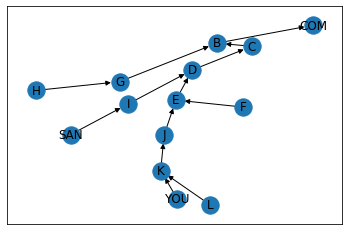

In [388]:
eog2 = OrbitGraph(example_input_6_2)

g = networkx.DiGraph(eog2.child_map).reverse()
networkx.draw_networkx(g)

In [391]:
networkx.shortest_path_length(eog2.nx_graph.to_undirected(), 'YOU', 'SAN') - 2

4

In [392]:
networkx.shortest_path_length(og.nx_graph.to_undirected(), 'YOU', 'SAN') - 2

259

# 7 - https://adventofcode.com/2019/day/7

In [555]:
class Intcoder6(IntCoder52):
    def run_on_buffer(self, buffer, reset_iptr=True):
        if isinstance(buffer, str):
            buffer = [int(i) for i in buffer.split(',')]
            
        super().run_on_buffer(buffer, reset_iptr)
        return buffer
ic6 = Intcoder6()

In [556]:
def run_intcoder_on_amps(phase_schedule, buffer, intcoder_class=Intcoder6, verbose=True):
    if len(phase_schedule) != 5:
        raise ValueError('need 5 phases')
    ic = intcoder_class()
    ic.outputs = [0]
    ic.verbose = verbose

    for amp, phase in zip('ABCDE', phase_schedule): 
        if verbose:
            print('On Amp', amp)
        ic.inputs = iter([phase, ic.outputs[-1]])
        ic.run_on_buffer(buffer)
    return ic.outputs

In [557]:
example_input_7_1 = '3,15,3,16,1002,16,10,16,1,16,15,15,4,15,99,0,0'
assert run_intcoder_on_amps([4,3,2,1,0], example_input_7_1)[-1] == 43210

On Amp A
Output: 4
On Amp B
Output: 43
On Amp C
Output: 432
On Amp D
Output: 4321
On Amp E
Output: 43210


In [558]:
from itertools import permutations


In [559]:
def find_best_phase(code):
    phase_options = list(permutations(range(5)))
    maxres = -1
    best_phases = None
    for phases in tqdm(phase_options):
        res = run_intcoder_on_amps(phases, code, verbose=False)[-1]
        if res > maxres:
            best_phases = phases
            maxres = res
    return best_phases, maxres

find_best_phase(example_input_7_1)

((4, 3, 2, 1, 0), 43210)

In [560]:
example_input_7_2 = '3,23,3,24,1002,24,10,24,1002,23,-1,23,101,5,23,23,1,24,23,23,4,23,99,0,0'
ps, m = find_best_phase(example_input_7_2)
assert ps == (0, 1, 2, 3, 4)
assert m == 54321

In [561]:
example_input_7_3 = '3,31,3,32,1002,32,10,32,1001,31,-2,31,1007,31,0,33,1002,33,7,33,1,33,31,31,1,32,31,31,4,31,99,0,0,0'
ps, m = find_best_phase(example_input_7_3)
assert ps == (1,0, 4, 3, 2)
assert m == 65210

In [562]:
input_7='3,8,1001,8,10,8,105,1,0,0,21,46,67,76,101,118,199,280,361,442,99999,3,9,1002,9,4,9,1001,9,2,9,102,3,9,9,101,3,9,9,102,2,9,9,4,9,99,3,9,1001,9,3,9,102,2,9,9,1001,9,2,9,1002,9,3,9,4,9,99,3,9,101,3,9,9,4,9,99,3,9,1001,9,2,9,1002,9,5,9,101,5,9,9,1002,9,4,9,101,5,9,9,4,9,99,3,9,102,2,9,9,1001,9,5,9,102,2,9,9,4,9,99,3,9,1002,9,2,9,4,9,3,9,1002,9,2,9,4,9,3,9,101,2,9,9,4,9,3,9,101,1,9,9,4,9,3,9,102,2,9,9,4,9,3,9,102,2,9,9,4,9,3,9,1002,9,2,9,4,9,3,9,101,1,9,9,4,9,3,9,102,2,9,9,4,9,3,9,101,2,9,9,4,9,99,3,9,101,1,9,9,4,9,3,9,1002,9,2,9,4,9,3,9,102,2,9,9,4,9,3,9,101,1,9,9,4,9,3,9,101,2,9,9,4,9,3,9,102,2,9,9,4,9,3,9,101,2,9,9,4,9,3,9,102,2,9,9,4,9,3,9,1002,9,2,9,4,9,3,9,101,2,9,9,4,9,99,3,9,1001,9,1,9,4,9,3,9,1002,9,2,9,4,9,3,9,1002,9,2,9,4,9,3,9,101,1,9,9,4,9,3,9,102,2,9,9,4,9,3,9,1001,9,1,9,4,9,3,9,1002,9,2,9,4,9,3,9,1001,9,1,9,4,9,3,9,101,1,9,9,4,9,3,9,101,2,9,9,4,9,99,3,9,1002,9,2,9,4,9,3,9,1001,9,1,9,4,9,3,9,101,2,9,9,4,9,3,9,101,2,9,9,4,9,3,9,102,2,9,9,4,9,3,9,102,2,9,9,4,9,3,9,102,2,9,9,4,9,3,9,102,2,9,9,4,9,3,9,101,1,9,9,4,9,3,9,1001,9,2,9,4,9,99,3,9,102,2,9,9,4,9,3,9,102,2,9,9,4,9,3,9,101,2,9,9,4,9,3,9,101,1,9,9,4,9,3,9,101,2,9,9,4,9,3,9,1001,9,2,9,4,9,3,9,1001,9,2,9,4,9,3,9,101,2,9,9,4,9,3,9,1002,9,2,9,4,9,3,9,101,2,9,9,4,9,99'

In [563]:
find_best_phase(input_7)

((2, 1, 3, 4, 0), 87138)

### Part 2

now must keep amp buffers distinct...

In [570]:
def make_amp_buffers(code):
    return {amp:[[int(i) for i in code.split(',')], 0] for amp in 'ABCDE'}

In [571]:
example_input_72_1 = '3,26,1001,26,-4,26,3,27,1002,27,2,27,1,27,26,27,4,27,1001,28,-1,28,1005,28,6,99,0,0,5'

In [574]:
phases = [9,8,7,6,5]
buffers = make_amp_buffers(example_input_72_1)
amp_iptr = {}

ic = Intcoder6()
ic.outputs = [0]
ic.verbose = False

for ph, amp in zip(phases, buffers):
    ic.inputs = iter([ph, ic.outputs[-1]])
    ic.run_on_buffer(buffers[amp][0])
    buffers[amp][1] = ic.i_ptr
    
print('setup done', ic.outputs)
    
test_buffers = []
while True:
    for amp in buffers:
        ic.inputs = iter([ic.outputs[-1]])
        ic.i_ptr = buffers[amp][1]
        ic.run_on_buffer(buffers[amp][0], reset_iptr=False)
        test_buffers.append(amp+str(buffers[amp]))

setup done [0, 5, 14, 31, 64, 129]


KeyboardInterrupt: 

# 8 - https://adventofcode.com/2019/day/8


# 9 - https://adventofcode.com/2019/day/9


# 10 - https://adventofcode.com/2019/day/10


# 11 - https://adventofcode.com/2019/day/11


# 12 - https://adventofcode.com/2019/day/12


# 13 - https://adventofcode.com/2019/day/13


# 14 - https://adventofcode.com/2019/day/14


# 15 - https://adventofcode.com/2019/day/15


# 16 - https://adventofcode.com/2019/day/16


# 17 - https://adventofcode.com/2019/day/17


# 18 - https://adventofcode.com/2019/day/18


# 19 - https://adventofcode.com/2019/day/19


# 20 - https://adventofcode.com/2019/day/20


# 21 - https://adventofcode.com/2019/day/21


# 22 - https://adventofcode.com/2019/day/22



# 23 - https://adventofcode.com/2019/day/23


# 24 - https://adventofcode.com/2019/day/24


# 25 - https://adventofcode.com/2019/day/25